<a href="https://colab.research.google.com/github/Sajuranjith/Indian-Personal-Finance-and-Spending-Habits/blob/main/Indian_Personal_Finance_and_Spending_Habits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**Indian Personal Finance and Spending Habits**

**Name: Saju.T**

**Organization: Entri Elevate**

**Date:**

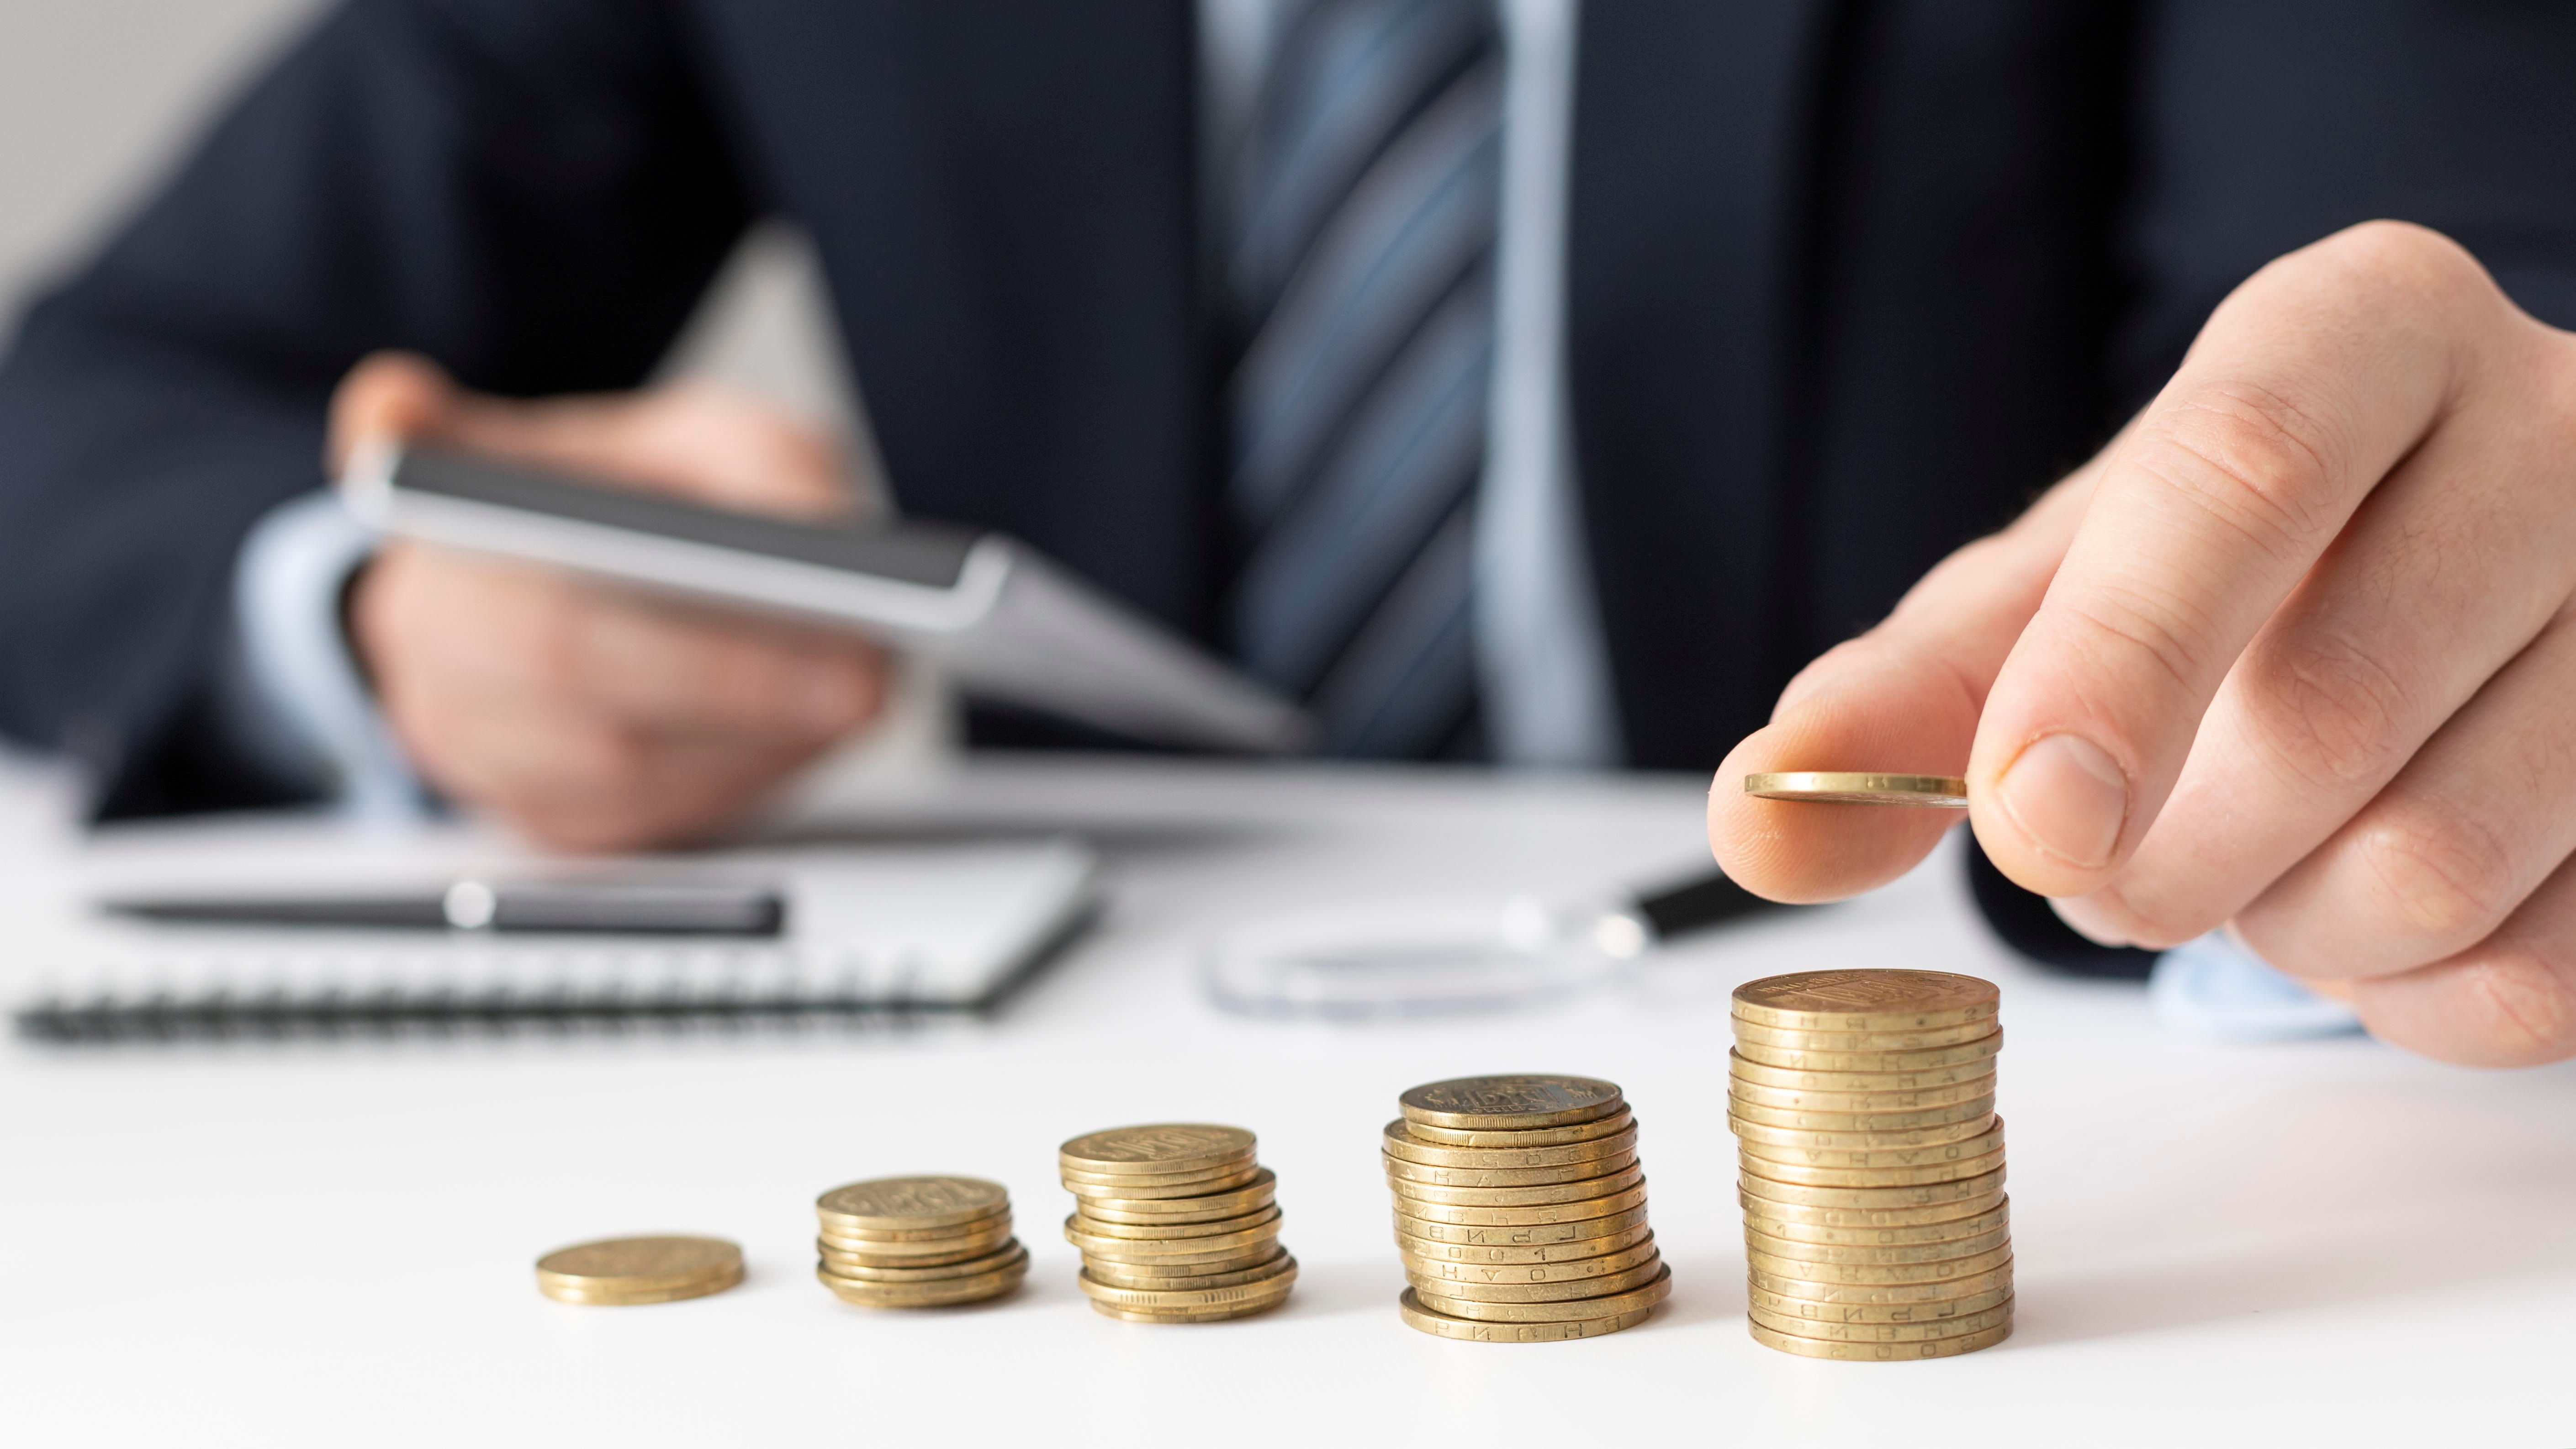

##**Overview Of This Project:**

This project uses the Indian Personal Finance and Spending Habits dataset, which contains detailed information on individuals’ income, expenses, savings goals, and financial behavior across various demographic segments in India. The objective is to predict an individual's potential to save or classify their financial behavior (e.g., high saver, moderate saver, low saver) based on features such as income, occupation, city tier, and expenditure patterns. This analysis aims to provide actionable insights into personal budgeting and help build models that can support financial advisory tools, targeted savings recommendations, and policy-making for financial inclusion.

##**Use Of This Dataset:**


This dataset is ideal for analyzing personal finance patterns and spending habits across diverse demographic groups in India. It offers valuable insights into how factors like income, age, occupation, city tier, and number of dependents influence household expenditures and savings behavior. The dataset can be used to identify trends in budgeting, evaluate the effectiveness of different saving strategies, and assess the impact of lifestyle choices on financial outcomes. It is also well-suited for predictive modeling—such as forecasting savings potential, classifying financial profiles, and clustering users based on spending behavior—making it a powerful tool for financial planning, targeted marketing, and policy development.

##**Objective:**


The goal of this project is to study how people in India **Earn**, **Spend**, and **Save Money**.This project can help individuals, banks, or financial apps give better money-saving tips based on a person's lifestyle.

##**Dataset Link :**

https://content/IndianPersonalFianceandSpendingHabits.csv

#**Data Description:**
   - **Source :** kaggle.com
   - **Personal Details :**
        - Age – Age of the person

        - Dependents – Number of dependents in the family

        - Occupation – Type of job (e.g., Student,       Self-Employed, Professional, Retired)
        
        - City_Tier – City classification (Tier 1, Tier 2,   Tier 3)

   - **Income & Fixed Costs :**
    - Income – Monthly income

    - Rent – Monthly rent paid

    - Loan_Repayment – Monthly loan EMIs

    - Insurance – Monthly insurance premium

- **Spending Categories :**
    - Groceries – Monthly groceries expense

    - Transport – Monthly transport cost

    - Eating_Out, Entertainment, Utilities, Healthcare, Education, Miscellaneous - Other regular expenses

- **Savings Data :**
    - Desired_Savings_Percentage – % of income the person wants to save

    - Desired_Savings – Target amount to save

    - Disposable_Income – Money left after all expenses

- **Potential Savings :**
    - Estimated money that could be saved in each category if spending is optimized:

       - Potential_Savings_Groceries, Transport, Eating_Out, Utilities, Entertainment, Healthcare, Education, Miscellaneous.




In [8]:
# Loading Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,precision_score,f1_score,recall_score,roc_curve, auc
from sklearn.model_selection import GridSearchCV
import joblib

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
df=pd.read_csv('/content/IndianPersonalFianceandSpendingHabits.csv')

In [11]:
df.columns

Index(['Income', 'Age', 'Dependents', 'Occupation', 'City_Tier', 'Rent',
       'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out',
       'Entertainment', 'Utilities', 'Healthcare', 'Education',
       'Miscellaneous', 'DS_Percentage', 'Desired_Savings',
       'Disposable_Income', 'PS_Groceries', 'PS_Transport', 'PS_Eating_Out',
       'PS_Entertainment', 'PS_Utilities', 'PS_Healthcare', 'PS_Education',
       'PS_Miscellaneous'],
      dtype='object')

##**Statistical informations**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             20000 non-null  float64
 1   Age                20000 non-null  int64  
 2   Dependents         20000 non-null  int64  
 3   Occupation         20000 non-null  object 
 4   City_Tier          20000 non-null  object 
 5   Rent               20000 non-null  float64
 6   Loan_Repayment     20000 non-null  float64
 7   Insurance          20000 non-null  float64
 8   Groceries          20000 non-null  float64
 9   Transport          20000 non-null  float64
 10  Eating_Out         20000 non-null  float64
 11  Entertainment      20000 non-null  float64
 12  Utilities          20000 non-null  float64
 13  Healthcare         20000 non-null  float64
 14  Education          20000 non-null  float64
 15  Miscellaneous      20000 non-null  float64
 16  DS_Percentage      200

In [13]:
df.describe()

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,PS_Groceries,PS_Transport,PS_Eating_Out,PS_Entertainment,PS_Utilities,PS_Healthcare,PS_Education,PS_Miscellaneous
count,2.000000e+04,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,...,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,4.158550e+04,41.031450,1.995950,9115.494629,2049.800292,1455.028761,5205.667493,2704.466685,1461.856982,1448.853658,...,4982.878416,10647.367257,912.197183,473.042650,254.963280,254.031058,436.332808,41.524964,62.417083,144.904987
std,4.001454e+04,13.578725,1.417616,9254.228188,4281.789941,1492.938435,5035.953689,2666.345648,1481.660811,1489.019270,...,7733.468188,11740.637289,1038.884968,537.222853,296.047943,299.973590,503.200658,53.152458,98.842656,169.160951
min,1.301187e+03,18.000000,0.000000,235.365692,0.000000,30.002012,154.078240,81.228584,39.437523,45.421469,...,0.000000,-5400.788673,16.575501,8.268076,3.797926,3.121610,6.200297,0.001238,0.000000,2.091973
25%,1.760488e+04,29.000000,1.000000,3649.422245,0.000000,580.204749,2165.426419,1124.578013,581.011801,581.632906,...,1224.932636,3774.894323,317.811000,161.913751,84.506870,84.562090,148.013618,11.037421,4.926210,47.637307
50%,3.018538e+04,41.000000,2.000000,6402.751824,0.000000,1017.124681,3741.091534,1933.845509,1029.109727,1020.198375,...,2155.356763,7224.890977,607.038735,307.045856,164.927660,164.740232,285.739582,25.202124,33.127987,93.090257
75%,5.176545e+04,53.000000,3.000000,11263.940490,2627.142320,1787.160895,6470.892718,3360.597508,1807.075251,1790.104081,...,6216.309609,13331.950715,1128.681837,588.419602,313.398240,310.927935,538.983703,52.353736,80.946145,178.257981
max,1.079728e+06,64.000000,4.000000,215945.674700,123080.682000,38734.932930,119816.898100,81861.503460,34406.100170,38667.368310,...,245504.485200,377060.218500,34894.644400,12273.258240,5573.036433,6222.200913,8081.799518,1394.531049,3647.244243,4637.951137


##**Numerical Columns:**

In [14]:
df.isnull().sum() # check the null values in columns

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [15]:
df.duplicated().sum() # check whether there is any duplicated values

np.int64(0)

In [16]:
df.shape

(20000, 27)

#**DATA PREPROCESSING**



Handling missing values by using imputation techniques:

- Mode

- Removing rows/columns with missing data.

In [17]:
#"Filling null values using fillna() allows to replace missing data with a specified value, statistical measure".
df['Loan_Repayment']=df['Loan_Repayment'].fillna(df['Loan_Repayment'].median())

In [18]:
#"Filling null values using fillna() allows to replace missing data with a specified value, statistical measure".
df['Education']=df['Education'].fillna(df['Education'].median())

In [19]:
#"Filling null values using fillna() allows to replace missing data with a specified value, statistical measure".
df['PS_Education']=df['PS_Education'].fillna(df['PS_Education'].median())

In [20]:
# removing warnings
import warnings
warnings.filterwarnings('ignore')


In [21]:
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


In [22]:
# Total rows with at least one missing value
missing_rows = df[df.isnull().any(axis=1)].shape[0]
print(f"Rows with missing values: {missing_rows} ({missing_rows/len(df)*100:.2f}%)")

# Drop them if < 5% of data
if missing_rows / len(df) < 0.05:
    df_cleaned = df.dropna()
else:
    # Prefer filling
    df_cleaned = df.fillna(df.median(numeric_only=True))

Rows with missing values: 0 (0.00%)


In [23]:
# rechecking null values
df.isnull().sum()

,0
Income,0
Age,0
Dependents,0
Occupation,0
City_Tier,0
Rent,0
Loan_Repayment,0
Insurance,0
Groceries,0
Transport,0


"Now all the missing values are treated with suitable values"

In [24]:
# Display number of unique values for each column
unique_values = df.nunique().sort_values()

# Print results
print("=== Unique Values Per Column ===")
print(unique_values)

=== Unique Values Per Column ===
City_Tier                3
Occupation               4
Dependents               5
Age                     47
Loan_Repayment        7970
Education            15940
PS_Education         15940
Desired_Savings      19888
Disposable_Income    19999
Insurance            20000
Eating_Out           20000
Transport            20000
Entertainment        20000
Groceries            20000
Rent                 20000
Income               20000
Miscellaneous        20000
Healthcare           20000
Utilities            20000
DS_Percentage        20000
PS_Transport         20000
PS_Eating_Out        20000
PS_Entertainment     20000
PS_Groceries         20000
PS_Utilities         20000
PS_Healthcare        20000
PS_Miscellaneous     20000
dtype: int64


##**Filtering numerical columns**

In [25]:
numerical_cols=df.select_dtypes('number')
numerical_cols

,Income,Age,Dependents,Rent,Loan_Repayment,Insurance,Groceries,Transport,Eating_Out,Entertainment,...,Desired_Savings,Disposable_Income,PS_Groceries,PS_Transport,PS_Eating_Out,PS_Entertainment,PS_Utilities,PS_Healthcare,PS_Education,PS_Miscellaneous
0,44637.249640,49,0,13391.174890,0.000000,2206.490129,6658.768341,2636.970696,1651.801726,1536.184255,...,6200.537192,11265.627710,1685.696222,328.895281,465.769172,195.151320,678.292859,67.682471,0.000000,85.735517
1,26858.596590,34,2,5371.719318,0.000000,869.522617,2818.444460,1543.018778,649.378103,1050.241738,...,1923.176434,9676.818733,540.306561,119.347139,141.866089,234.131168,286.668408,6.603212,56.306874,97.388606
2,50367.605080,35,1,7555.140763,4612.103386,2201.800050,6313.222081,3221.396403,1513.814376,1723.306926,...,7050.360422,13891.450620,1466.073984,473.549752,410.857129,459.965257,488.383423,7.290892,106.653597,138.542422
3,101455.600200,21,0,15218.340040,6809.441427,4889.418087,14690.149360,7106.130005,5040.249158,2858.194240,...,16694.965140,31617.953610,1875.932770,762.020789,1241.017448,320.190594,1389.815033,193.502754,0.000000,296.041183
4,24875.283550,52,4,4975.056710,3112.609398,635.907170,3034.329665,1276.155163,692.827225,660.186851,...,1874.099434,6265.700532,788.953124,68.160766,61.712505,187.173750,194.117130,47.294591,67.388120,96.557076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,40913.466180,51,4,12274.039850,7703.854895,1646.799940,5477.403246,2084.230191,1945.982149,1210.454952,...,1163.318310,1163.318310,597.028412,287.315050,347.658355,145.843671,212.833326,44.900294,98.765527,190.591917
19996,90295.772640,21,1,18059.154530,0.000000,2770.589626,13118.222420,4633.108332,3770.919375,2356.408295,...,10613.589600,30725.175170,3854.823822,359.602765,911.269461,424.064224,1555.548024,129.655981,239.445622,351.436046
19997,40604.567370,30,1,8120.913475,8089.612716,1548.564328,6018.276121,2493.563674,896.290751,1571.911103,...,2267.905134,2267.905134,1385.511100,379.927216,138.209465,297.695658,824.565267,57.891000,72.728663,122.569277
19998,118157.817200,27,2,35447.345170,12345.910540,4735.672471,16392.438430,8248.242279,2545.419412,4721.792454,...,10603.684810,10603.684810,3217.771594,2265.865033,726.247719,273.912367,859.230004,98.961780,92.189012,569.811212


##**Outlier Detection: Using Boxplot**

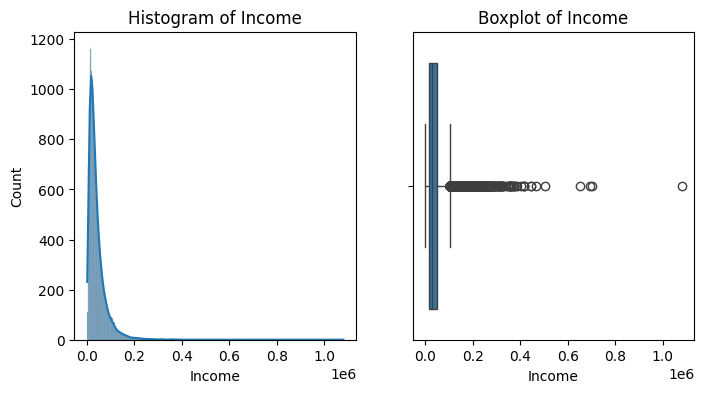

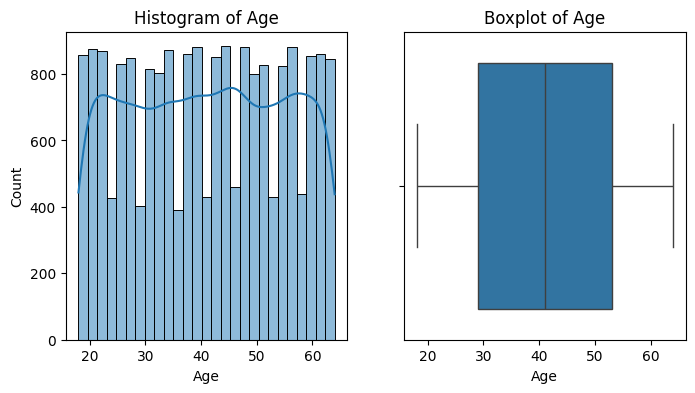

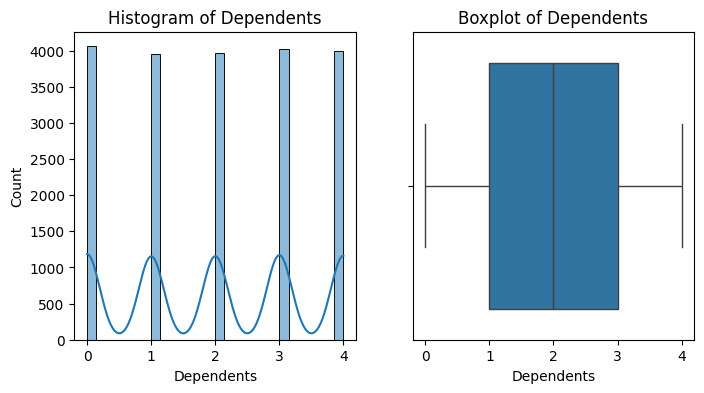

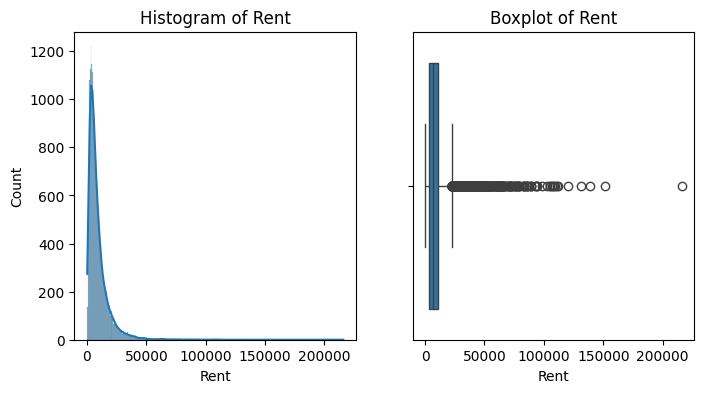

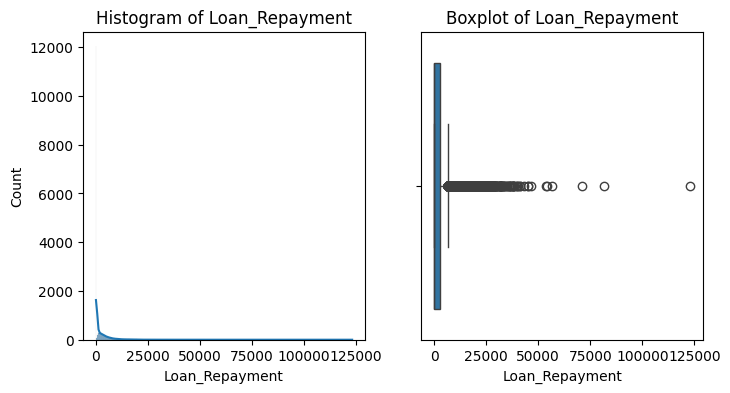

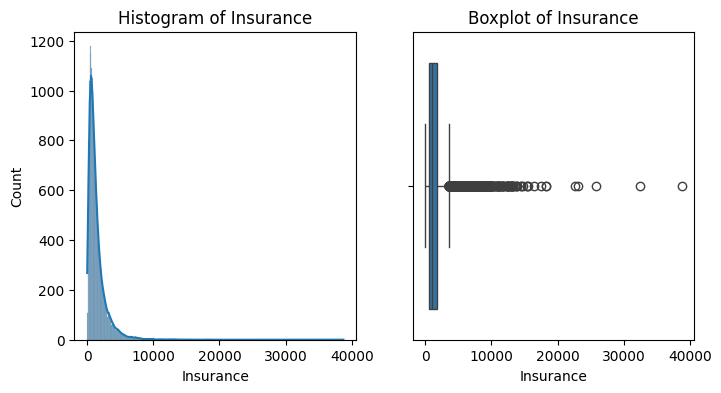

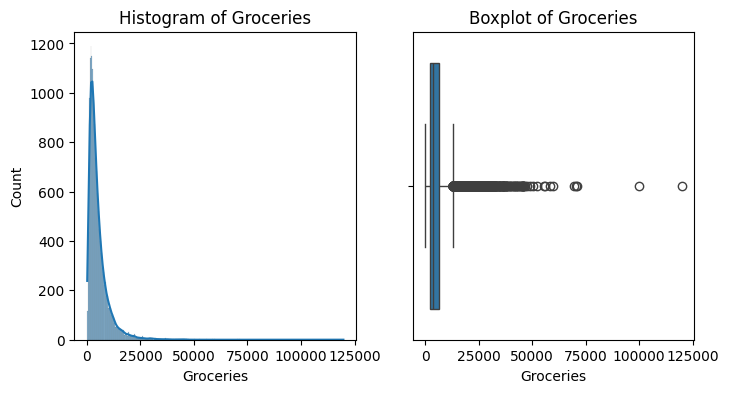

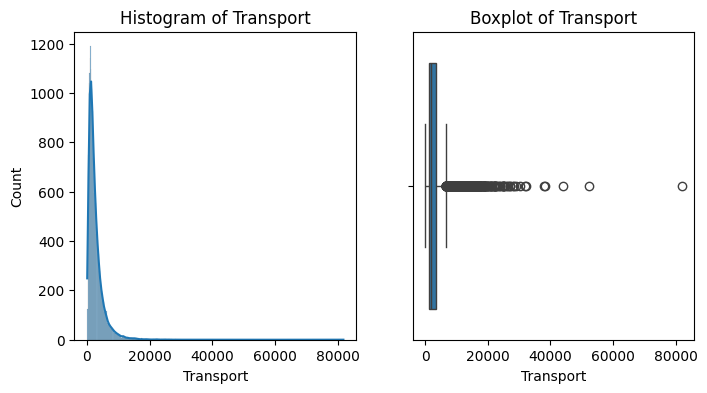

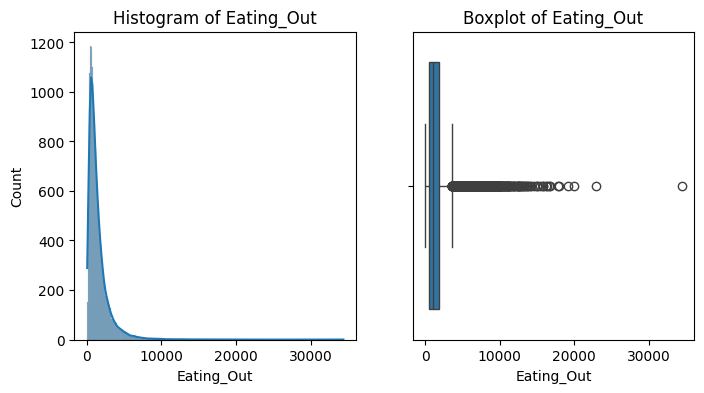

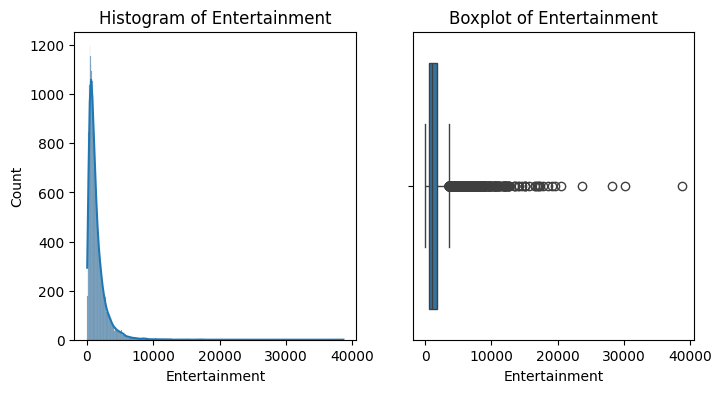

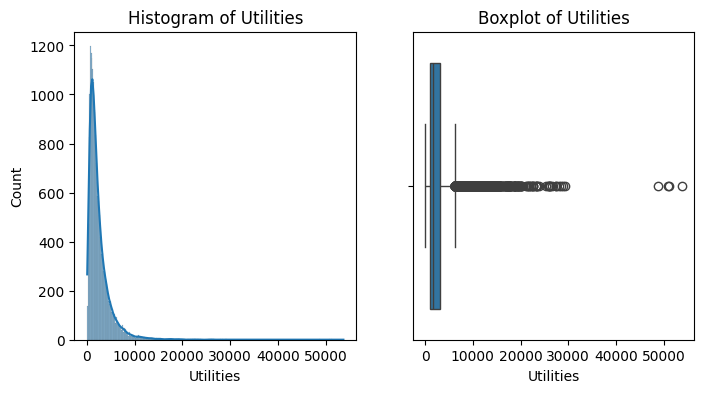

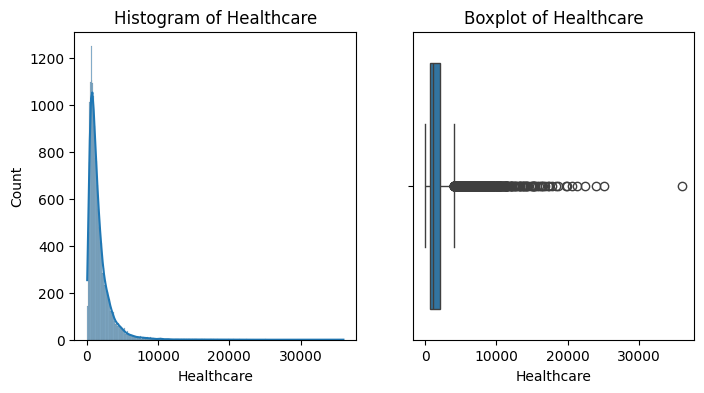

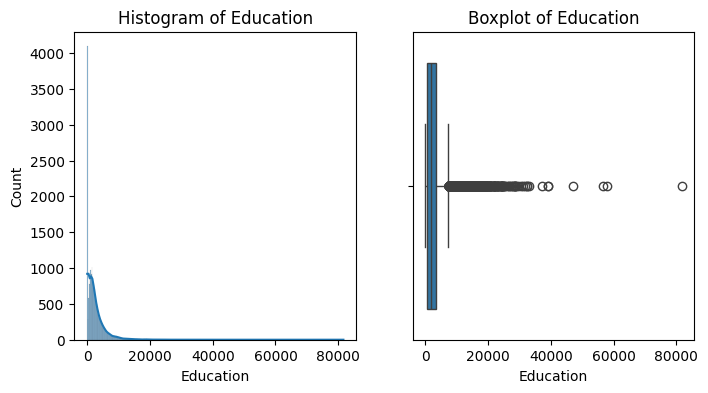

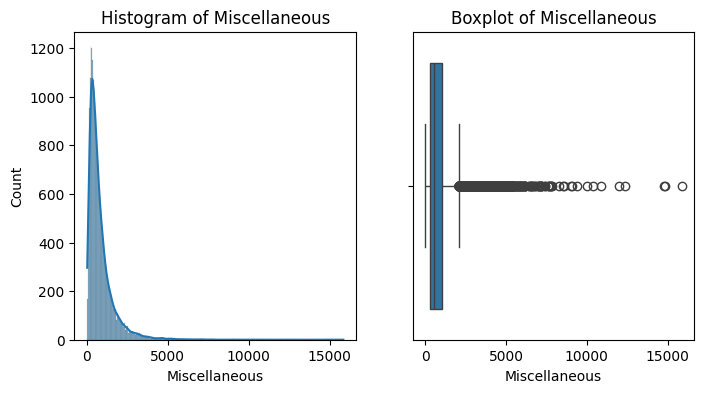

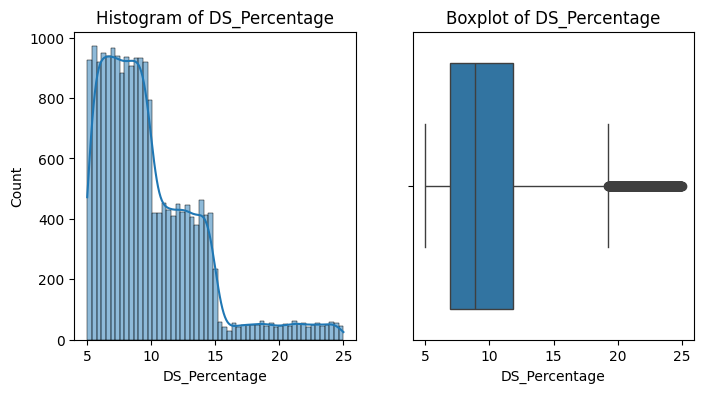

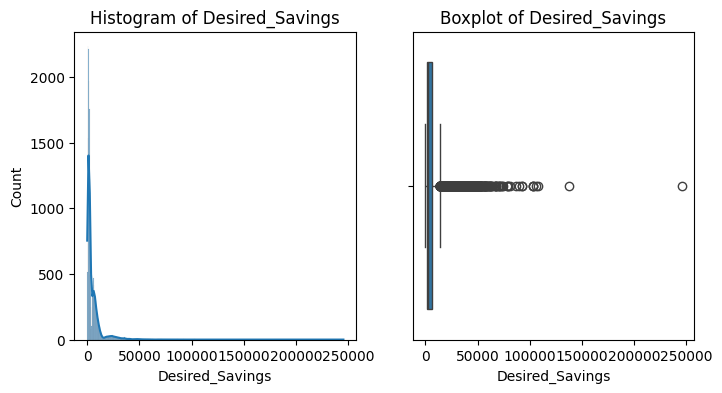

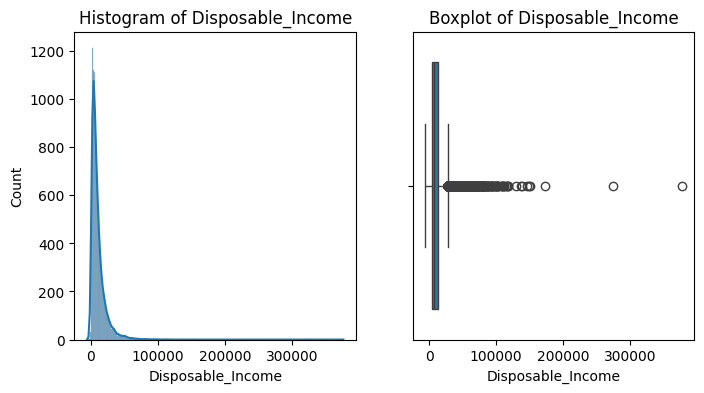

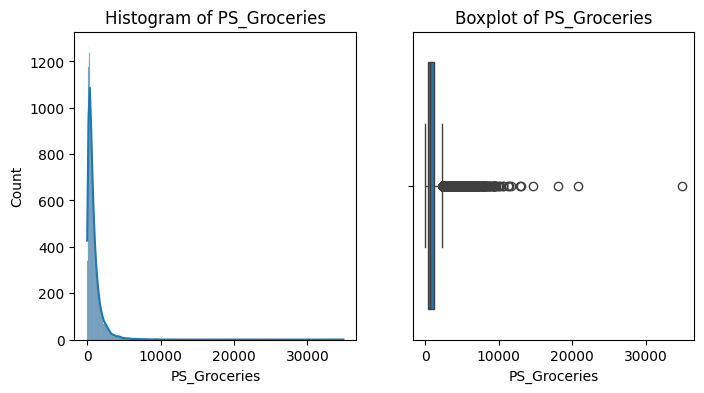

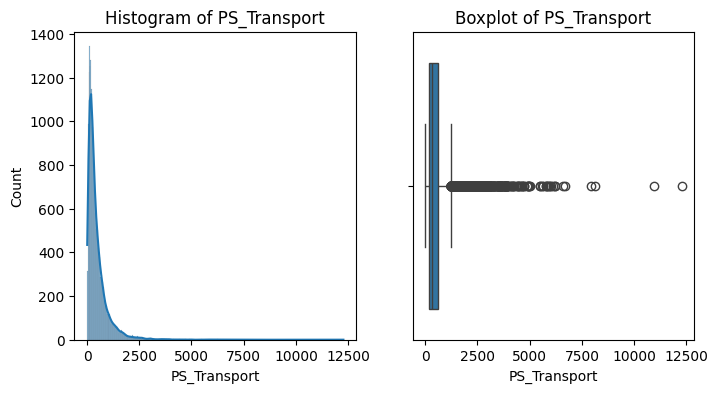

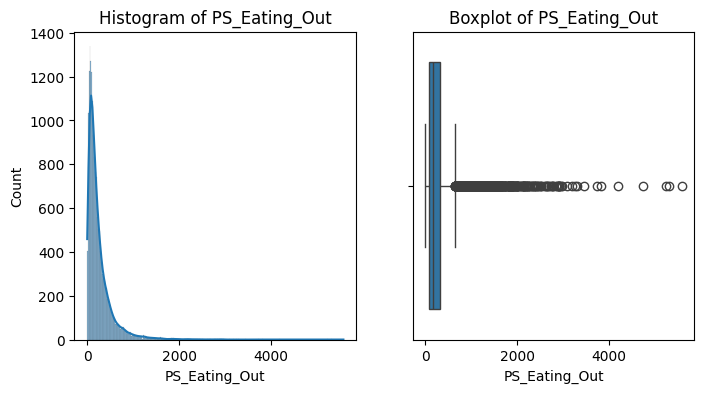

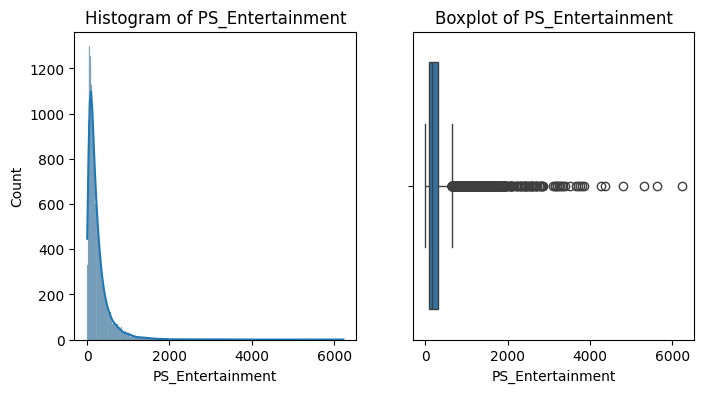

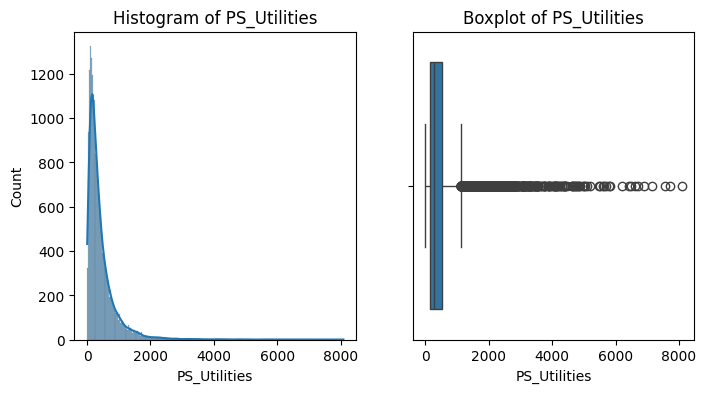

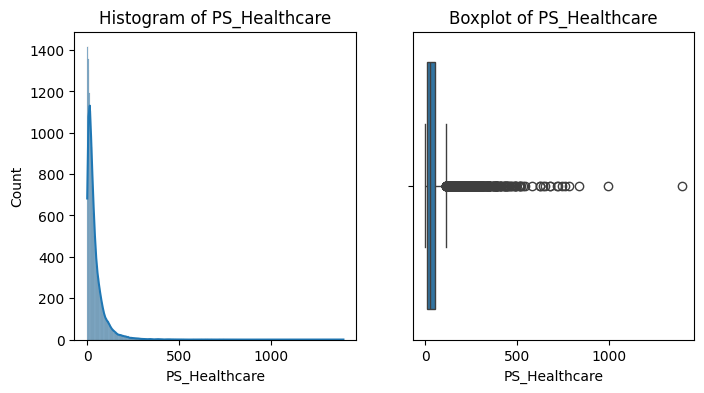

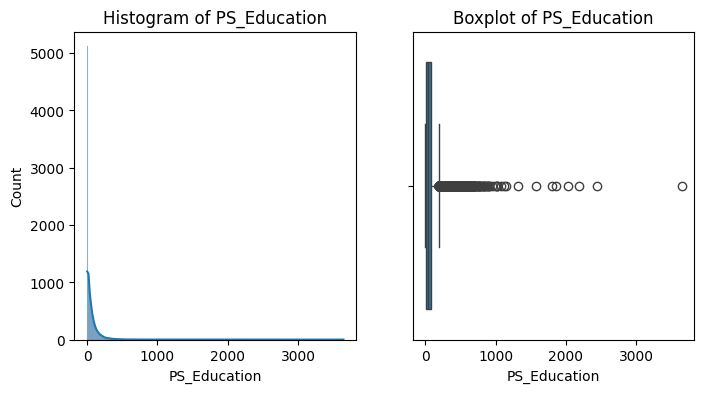

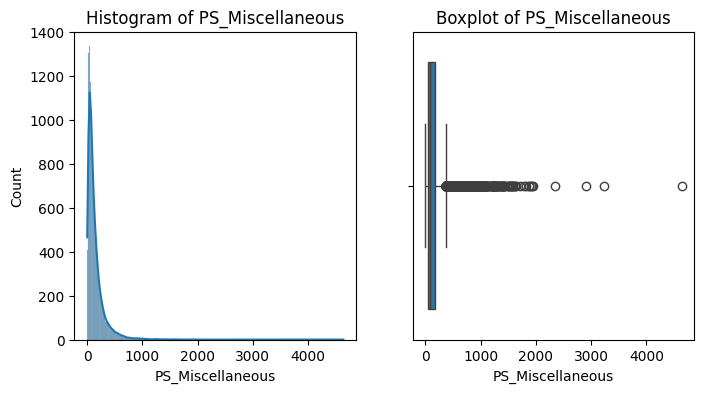

In [26]:
#checking for outliers using boxplot of numerical columns
for column in numerical_cols:
    plt.figure(figsize=(8, 4))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True)
    plt.title(f'Histogram of {column}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot of {column}')

- This boxplot indicating the presence of outlier in numerical columns

- **Income**

     Histogram: Right-skewed distribution (most users have low to moderate income, few with very high income).

     Boxplot: Shows many outliers on the higher end, confirming income inequality.

- **Desired_Savings**

     Histogram: Also right-skewed; majority save less, few save a lot.

     Boxplot: Outliers present, but not as extreme as Income.

- **Loan_Repayment**

 Histogram: Peaks at lower values with a long tail toward higher amounts.

 Boxplot: Multiple outliers; suggests variability in loan burden.

-  **Healthcare, Entertainment, Eating_Out, Transport, Groceries, Utilities, Miscellaneous**

 Histogram: Slight to moderate skew in many of these; clustered near low values.**

 Boxplot: Outliers are present but expected in real-world personal finance (some people spend more in specific areas).

- **Rent**

 Histogram: Bimodal tendency or right-skewed (could reflect urban vs rural differences).

 Boxplot: Clear outliers—some individuals pay significantly higher rent.

- **DS_Percentage** (Desired Savings as % of Income)

 Histogram: Centered with a bell-like curve; mild skew.

 Boxplot: Fewer outliers; useful as a clean feature for modeling.

- **Age**

 Histogram: Near-normal or slightly skewed distribution.

 Boxplot: Minimal outliers; age seems well-behaved.

- **Total_Spending & Derived Metrics**

 Histogram: Right-skewed, suggesting heavy spenders in the population.

 Boxplot: Clear outliers, which may need capping or binning.



In [27]:
# Select numeric columns only
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Remove outliers from all numeric columns using IQR
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    print(f"{col}: Removing values below {lower_bound:.2f} and above {upper_bound:.2f}")

    # Keep rows within bounds
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

# Optional: Round categorical-like numeric columns to integers
# Apply only if they should be integers (e.g., if you're keeping them)
categorical_like = ['Model Year', 'Legislative District']  # if these exist in your data
for col in categorical_like:
    if col in df.columns:
        df[col] = df[col].round().astype(int)

print("Outlier removal complete. Dataset shape:", df.shape)

Income: Removing values below -33635.98 and above 103006.30
Age: Removing values below -7.00 and above 89.00
Dependents: Removing values below -2.00 and above 6.00
Rent: Removing values below -6248.00 and above 19763.74
Loan_Repayment: Removing values below -3625.65 and above 6042.75
Insurance: Removing values below -760.40 and above 2638.62
Groceries: Removing values below -2229.37 and above 8778.10
Transport: Removing values below -1085.20 and above 4400.00
Eating_Out: Removing values below -627.40 and above 2354.71
Entertainment: Removing values below -569.15 and above 2241.50
Utilities: Removing values below -867.84 and above 3711.62
Healthcare: Removing values below -539.40 and above 2428.17
Education: Removing values below -1996.68 and above 4736.74
Miscellaneous: Removing values below -313.74 and above 1226.74
DS_Percentage: Removing values below 2.18 and above 13.37
Desired_Savings: Removing values below -950.41 and above 4196.03
Disposable_Income: Removing values below -4169.2

In [28]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64'])

# Calculate and display skewness
skewness = numerical_cols.skew()

# Print skewness in descending order for better understanding
print(" Skewness of numerical columns (high to low):")
print(skewness.sort_values(ascending=False))

 Skewness of numerical columns (high to low):
Loan_Repayment       1.451889
PS_Education         0.923092
PS_Eating_Out        0.899819
PS_Entertainment     0.896060
PS_Transport         0.878043
PS_Groceries         0.877790
PS_Miscellaneous     0.841855
PS_Utilities         0.835187
Rent                 0.826723
PS_Healthcare        0.812523
Disposable_Income    0.724387
Miscellaneous        0.711818
Insurance            0.684703
Eating_Out           0.649848
Entertainment        0.627911
Desired_Savings      0.531436
Utilities            0.530785
Healthcare           0.437566
Transport            0.403469
Groceries            0.375885
Education            0.276083
Income               0.245464
DS_Percentage        0.015176
Dependents           0.014717
Age                 -0.005824
dtype: float64


In [29]:
# Convert a specific column to integer
df['Income'] = df['Income'].astype(int)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10273 entries, 1 to 19999
Data columns (total 27 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Income             10273 non-null  int64  
 1   Age                10273 non-null  int64  
 2   Dependents         10273 non-null  int64  
 3   Occupation         10273 non-null  object 
 4   City_Tier          10273 non-null  object 
 5   Rent               10273 non-null  float64
 6   Loan_Repayment     10273 non-null  float64
 7   Insurance          10273 non-null  float64
 8   Groceries          10273 non-null  float64
 9   Transport          10273 non-null  float64
 10  Eating_Out         10273 non-null  float64
 11  Entertainment      10273 non-null  float64
 12  Utilities          10273 non-null  float64
 13  Healthcare         10273 non-null  float64
 14  Education          10273 non-null  float64
 15  Miscellaneous      10273 non-null  float64
 16  DS_Percentage      10273 no

##**Visualising skewness using Histogram**

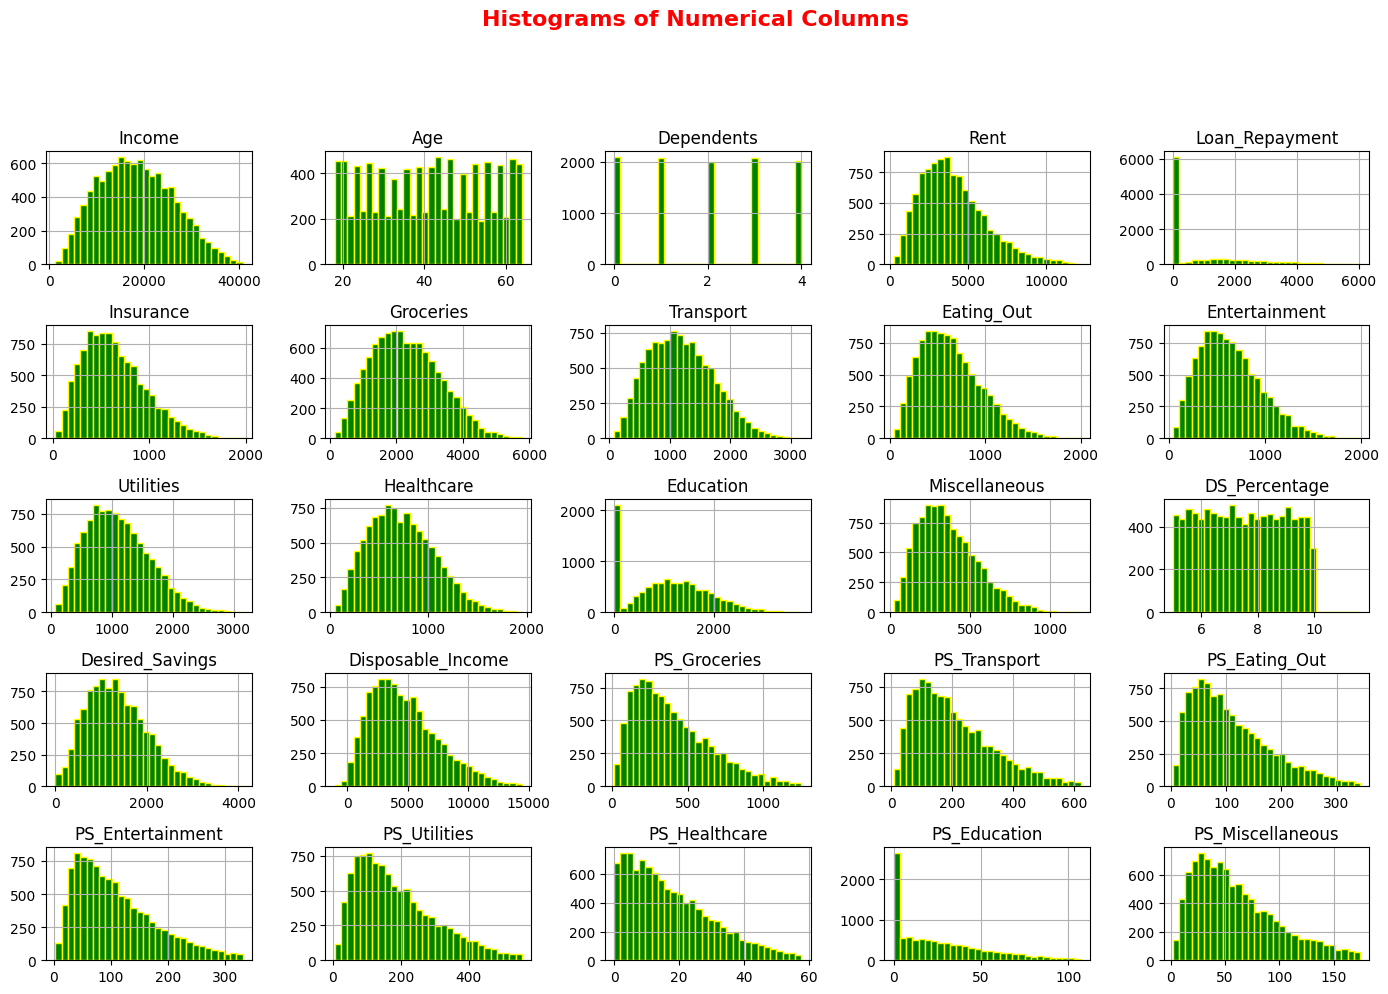

In [31]:
# Plot histograms for all numerical columns
numerical_cols.hist(
    figsize=(14, 10),
    bins=30,
    edgecolor='yellow',
    color='green'
)

# Add main title and subheading
plt.suptitle(
    'Histograms of Numerical Columns',
    color='red',
    fontsize=16,
    fontweight='bold',
    y=1.02  # Adjust position to fit title and subheading
)

#  Show the plot
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**Income** : skewness value is 4.23 it indicates that it is highly right-skewed (few very high earners)

**Age** : skewness value is ~0 it indicates that it is near-normal distribution

**Dependents**: skewness value is ~0 it indicates that it is balanced family sizes

**Rent**: skewness value is 4.15 it indicates that it is Skewed due to metro area outliers

**Loan_Repayment**: skewness value is 5.10 it indicates that it is Most people have no loans; a few have large loans

**Desired_Savings**: skewness value is 5.59 it indicates that it is Very skewed; most save less, few save a lot

 **Skewness Observations**


- Highly skewed columns (skewness > 4):
     Desired_Savings, Income, PS_Education, Entertainment, etc.

- Consider log transformation or Winsorization if        modeling.

- Balanced distributions: Age, Dependents (good for models)

**Income :**
     skewness value is 4.23  it indicates that it is highly right-skewed (few very high earners)

**Age :**
     skewness value is ~0  it indicates that it is near-normal distribution

**Dependents:**
     skewness value is ~0  it indicates that it is 	balanced family sizes

**Rent:**
     skewness value is 4.15  it indicates that it is 	Skewed due to metro area outliers

**Loan_Repayment:**
     skewness value is 5.10  it indicates that it is 	Most people have no loans; a few have large loans

**Desired_Savings:**
     skewness value is 5.59  it indicates that it is 	Very skewed; most save less, few save a lot

     Skewness Observations
- Highly skewed columns (skewness > 4): Desired_Savings, Income, PS_Education, Entertainment, etc.

-  Consider log transformation or Winsorization if modeling.

- Balanced distributions: Age, Dependents (good for models)      

In [32]:
#The Dependents column has a small skewness, so it is treated using the square root transformation method.
numerical_cols['Dependents']=numerical_cols['Dependents'].apply(lambda x:np.sqrt(x))

##**Histograms of Numerical Columns After Skewness Treatment**

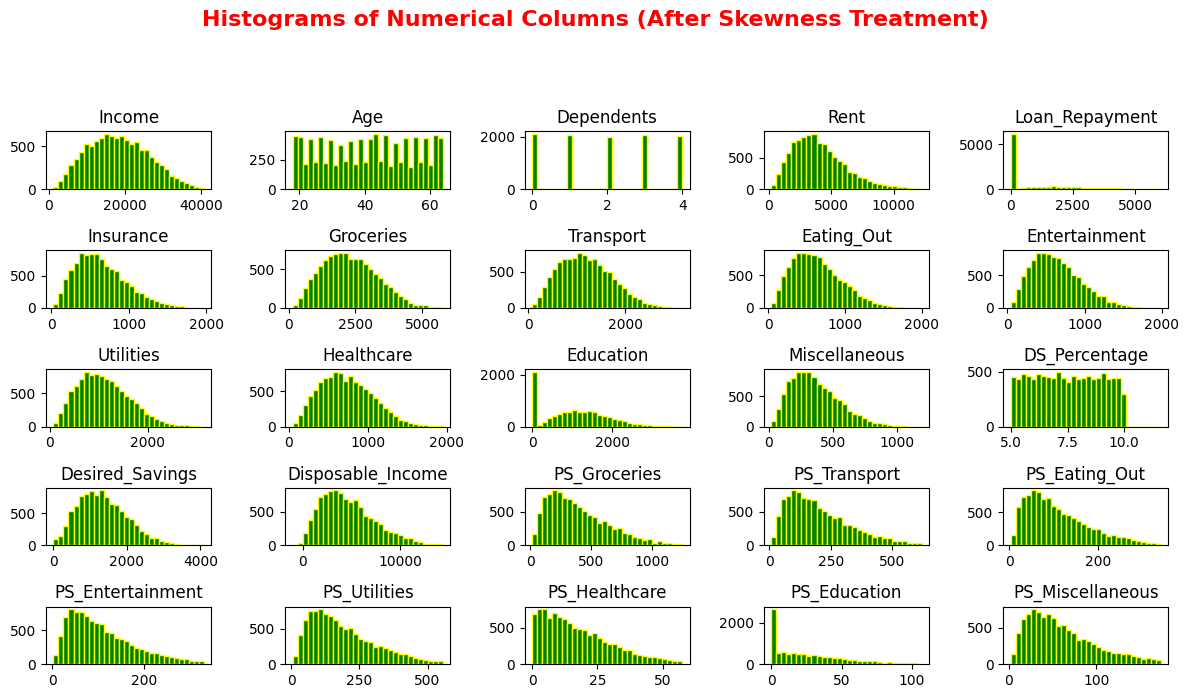

In [33]:
# Plot histograms for all numerical columns after skewness treatment
df.select_dtypes(include=['int64', 'float64']).hist(
    figsize=(12, 7),       # Slightly larger for better readability
    bins=30,               # Good detail level
    edgecolor='yellow',    # Bar borders
    color='green',         # Fill color
    grid=False
)

# Add a well-formatted main title
plt.suptitle(
    'Histograms of Numerical Columns (After Skewness Treatment)',
    color='red',
    fontsize=16,
    fontweight='bold',
    y=1.02                 # Adjust vertical spacing above subplots
)

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust for title spacing
plt.show()

##**Exploratory Data Analysis**

selecting categorical Columns and for Numerical columns for visualisation

In [34]:
# Identify column types
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

print("Categorical Columns:", categorical_cols)
print("Numerical Columns:", numerical_cols)




Categorical Columns: ['Occupation', 'City_Tier']
Numerical Columns: ['Income', 'Age', 'Dependents', 'Rent', 'Loan_Repayment', 'Insurance', 'Groceries', 'Transport', 'Eating_Out', 'Entertainment', 'Utilities', 'Healthcare', 'Education', 'Miscellaneous', 'DS_Percentage', 'Desired_Savings', 'Disposable_Income', 'PS_Groceries', 'PS_Transport', 'PS_Eating_Out', 'PS_Entertainment', 'PS_Utilities', 'PS_Healthcare', 'PS_Education', 'PS_Miscellaneous']


##**Categorical Column Visualization**

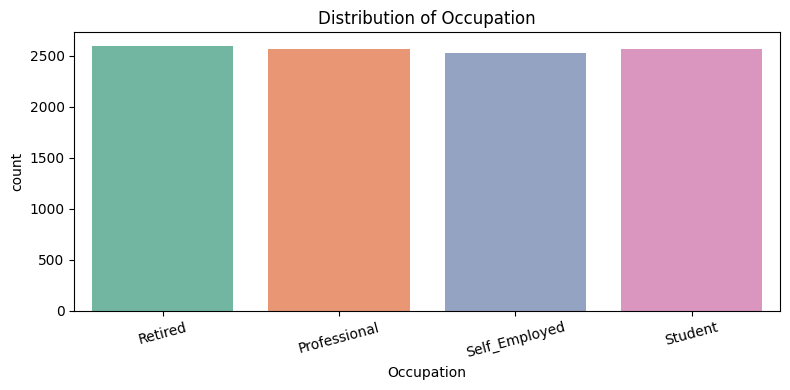

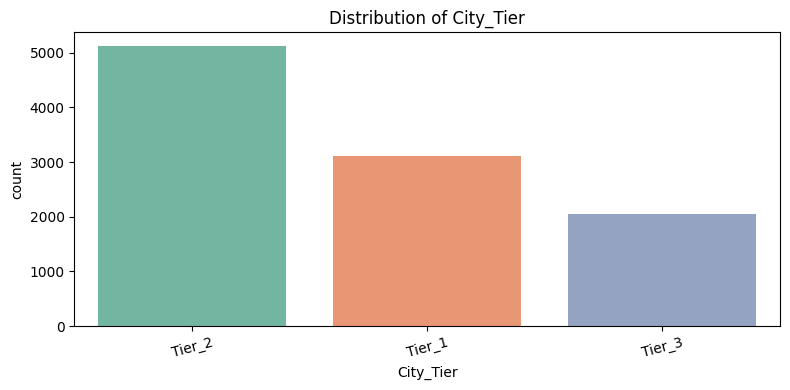

In [35]:
for col in categorical_cols:
    plt.figure(figsize=(8, 4))
    sns.countplot(x=col, data=df, palette='Set2')
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.show()

##**Numerical Column Visualization (Boxplot)**

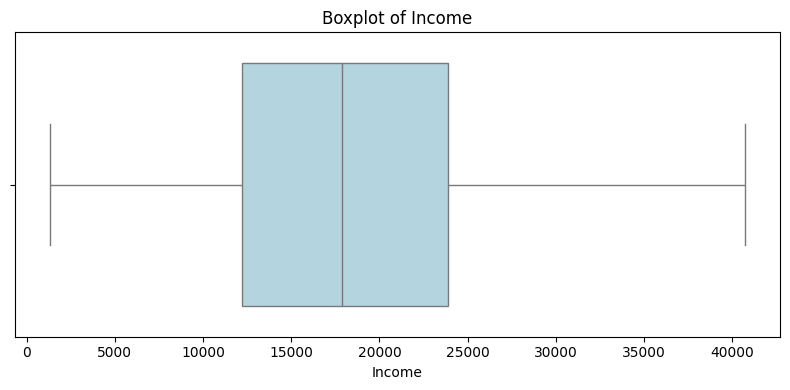

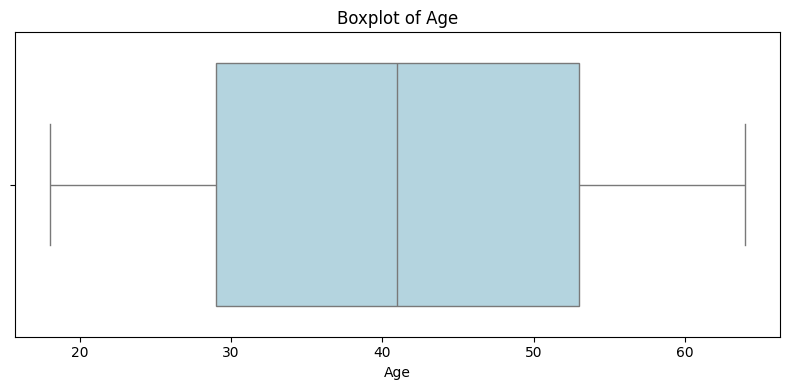

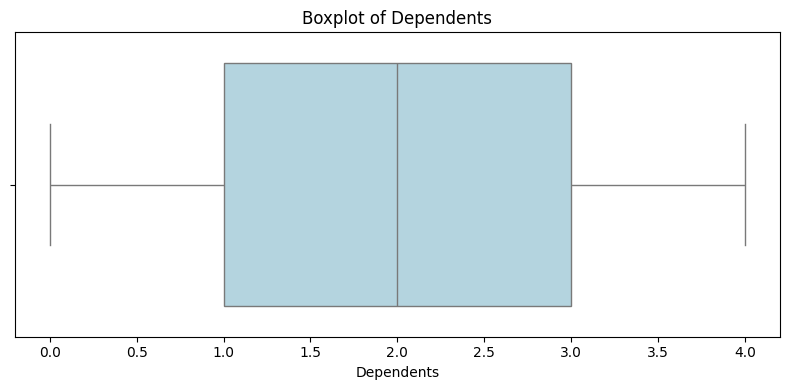

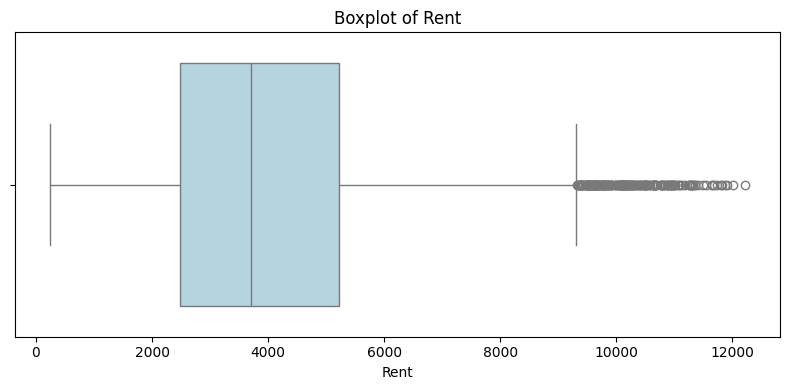

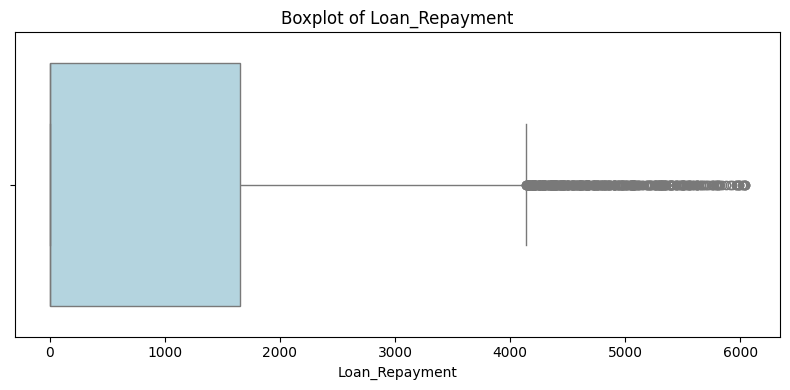

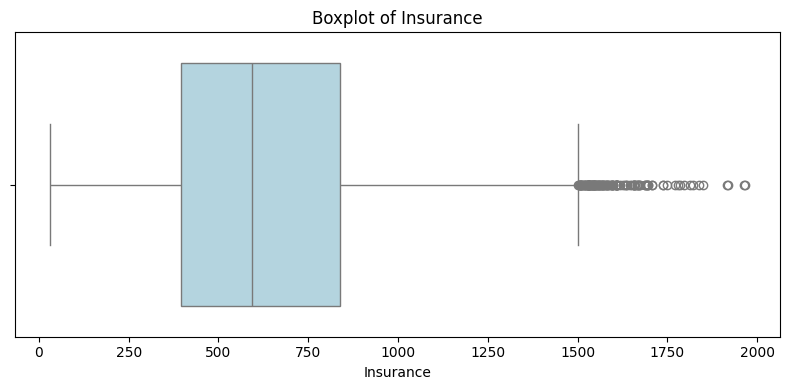

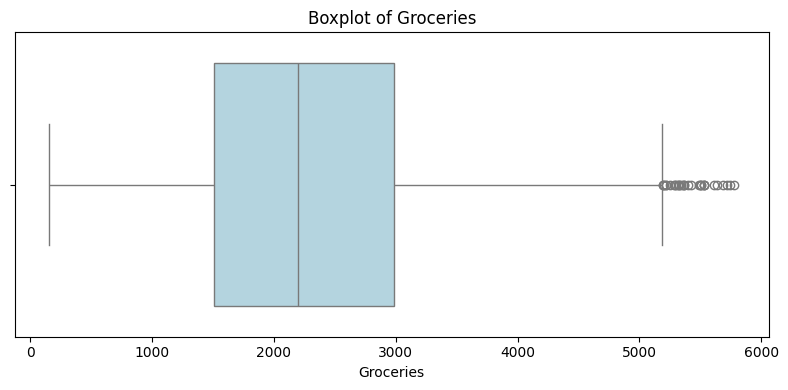

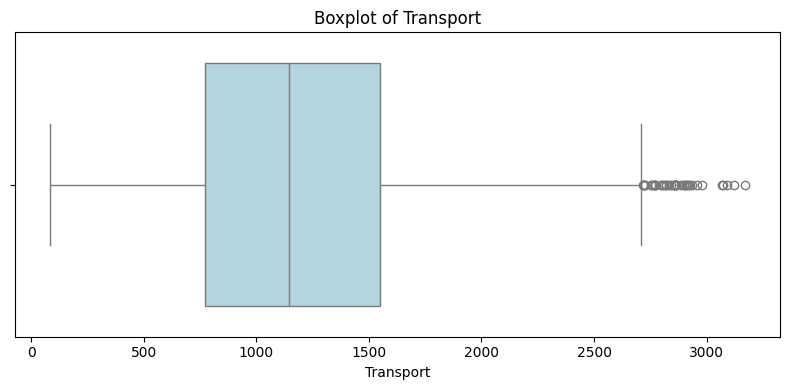

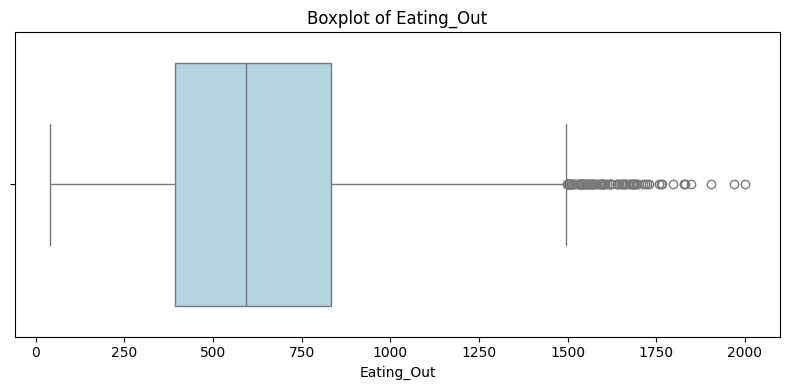

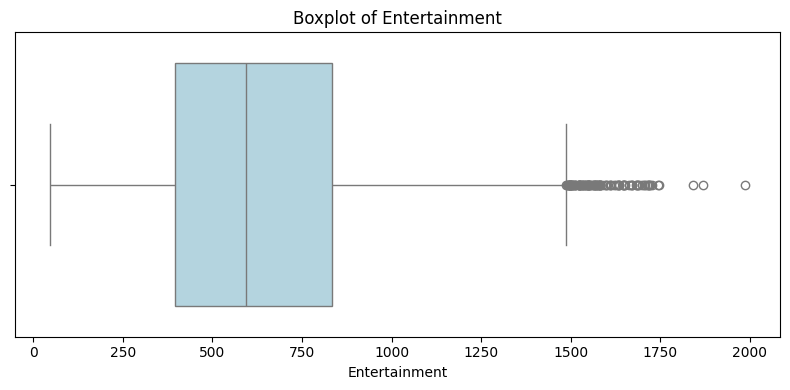

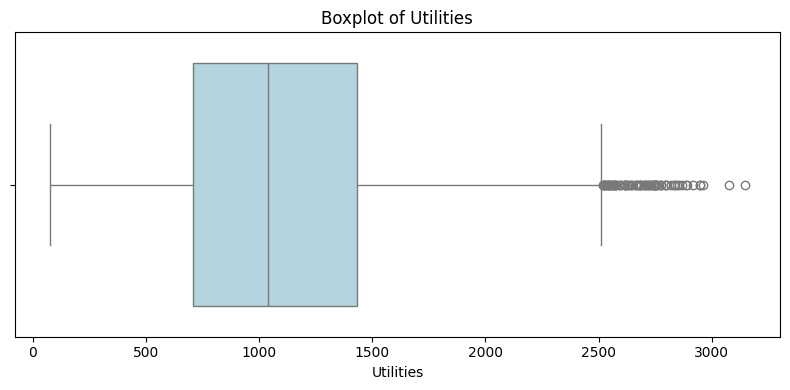

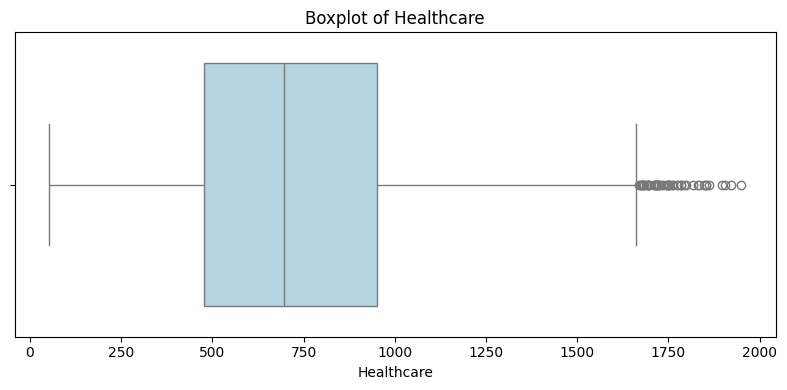

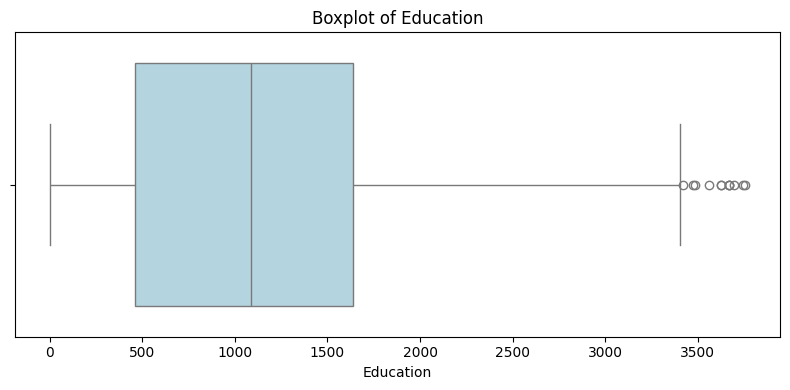

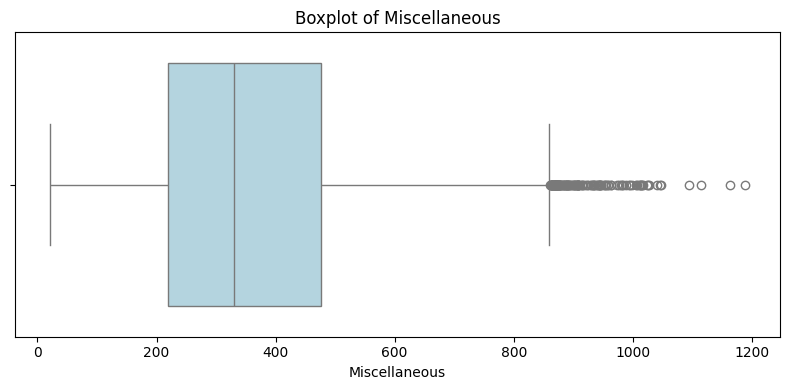

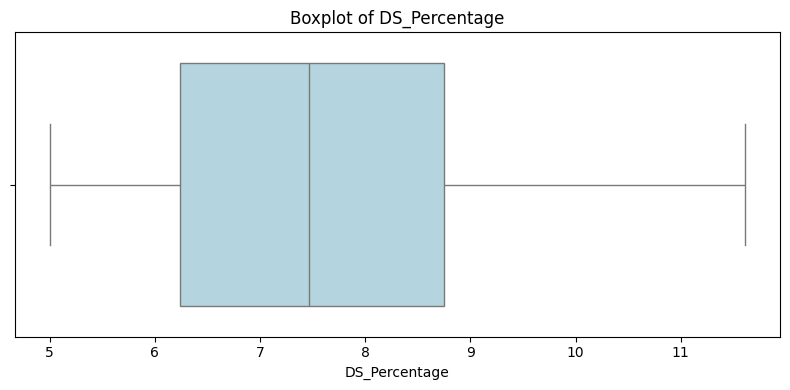

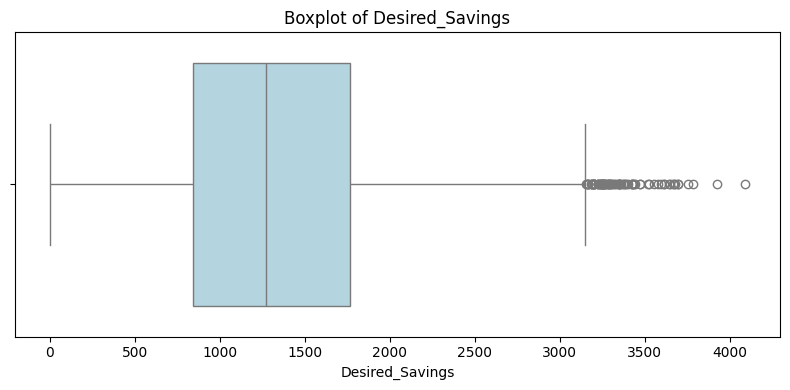

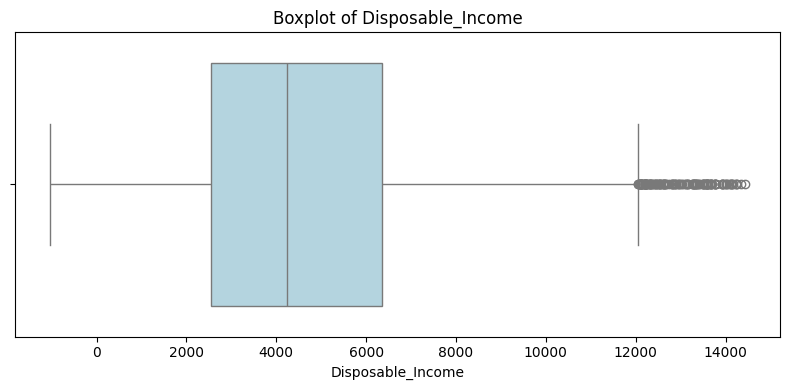

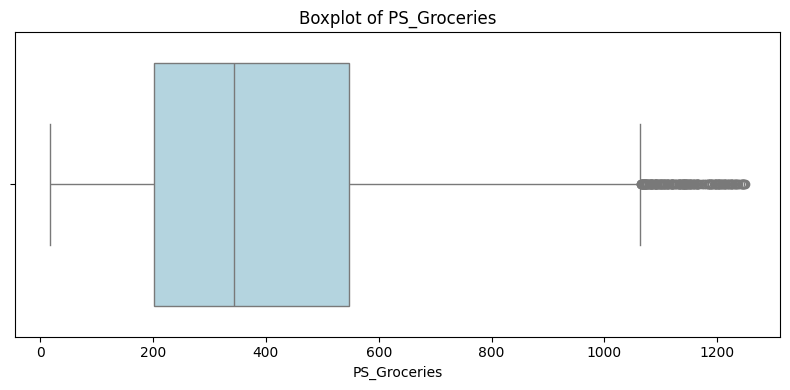

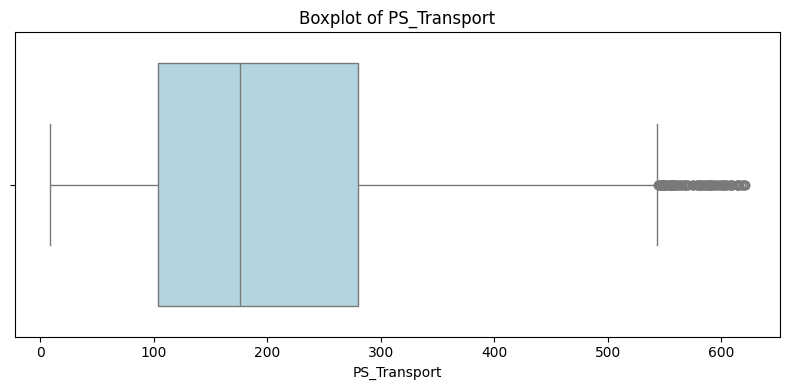

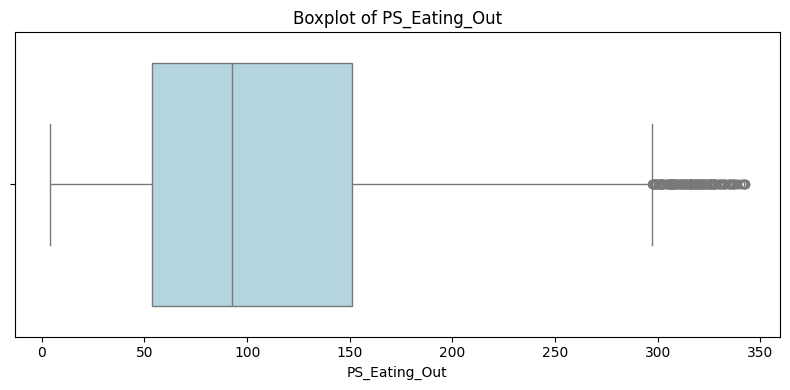

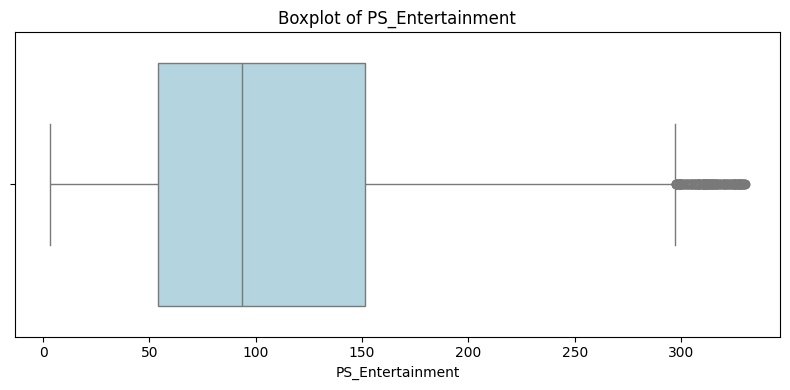

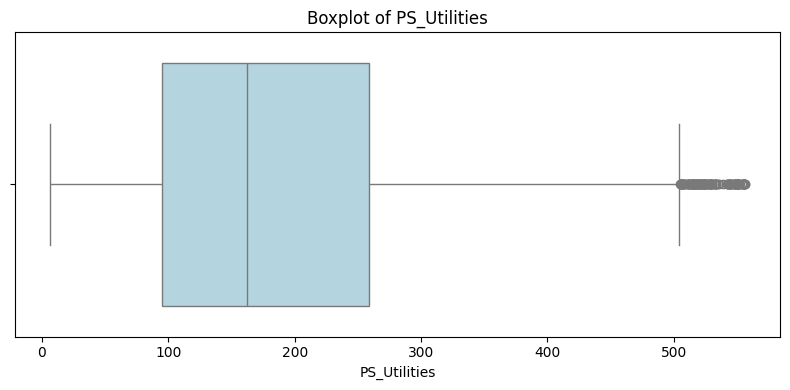

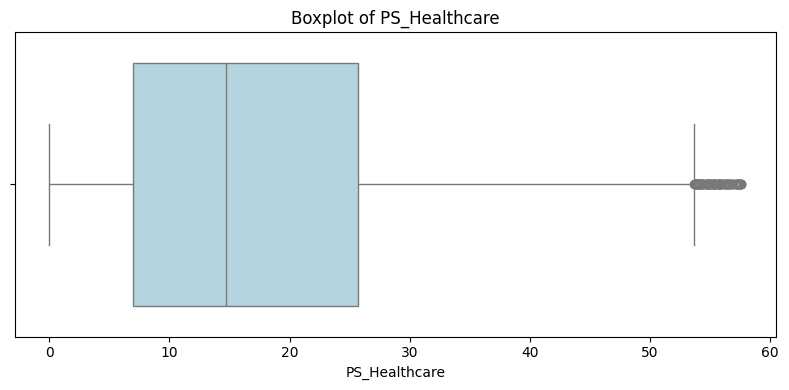

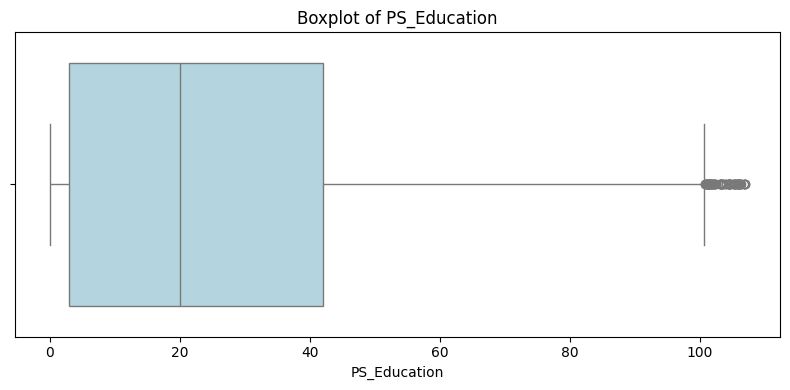

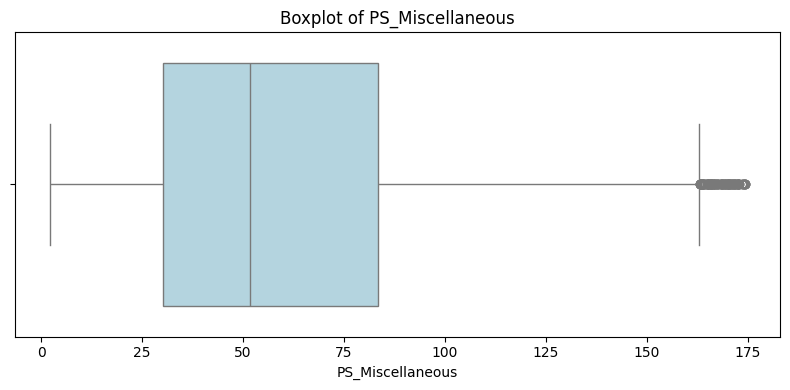

In [36]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col], color='lightblue')
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

##**Missing Values**

In [37]:
print("Missing Values in Each Column:")
print(df.isnull().sum())

Missing Values in Each Column:
Income               0
Age                  0
Dependents           0
Occupation           0
City_Tier            0
Rent                 0
Loan_Repayment       0
Insurance            0
Groceries            0
Transport            0
Eating_Out           0
Entertainment        0
Utilities            0
Healthcare           0
Education            0
Miscellaneous        0
DS_Percentage        0
Desired_Savings      0
Disposable_Income    0
PS_Groceries         0
PS_Transport         0
PS_Eating_Out        0
PS_Entertainment     0
PS_Utilities         0
PS_Healthcare        0
PS_Education         0
PS_Miscellaneous     0
dtype: int64


##**Correlation Heatmap**

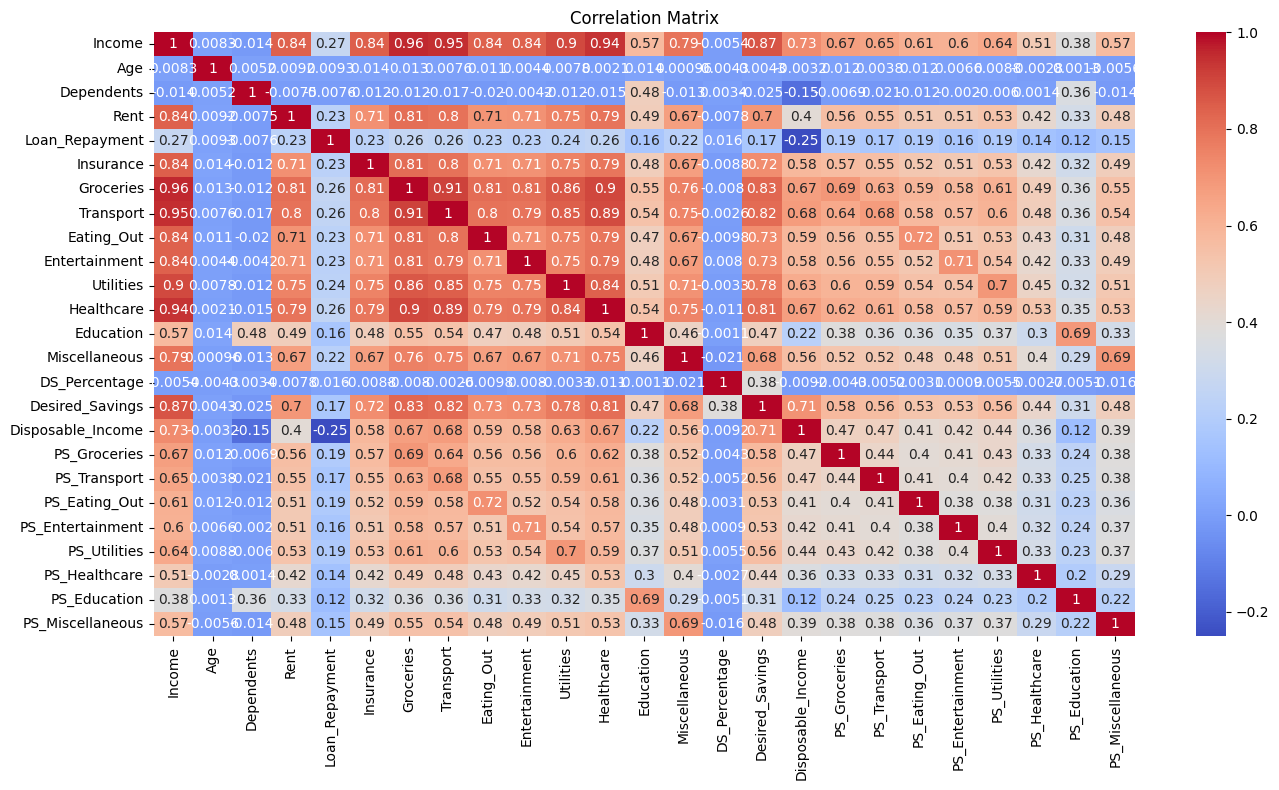

In [38]:
plt.figure(figsize=(14, 8))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


##**Feature Engineering**

In [39]:
#  Handle missing values (basic example)
df.fillna(df.mode().iloc[0], inplace=True)

In [40]:
# Create new features (example: total monthly expenses)
df_cleaned['Total_Monthly_Expenses'] = df_cleaned[['Groceries', 'Healthcare', 'Loan_Repayment']].sum(axis=1)

In [41]:
# Convert categorical to numerical (Label Encoding)
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = label_enc.fit_transform(df[col])


In [42]:
# Binning (example: income to category)
df_cleaned['Income_Level'] = pd.cut(df_cleaned['Income'], bins=[0, 20000, 50000, 100000, float('inf')],labels=['Low', 'Medium', 'High', 'Very High'])

In [43]:
# Normalize/Scale numerical features (for ML)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('income_level', errors='ignore')
df[num_cols] = scaler.fit_transform(df[num_cols])

##**Feature Selection**

In [48]:
 # Define the target column (change this to the actual column name you want to predict)
target_column = 'income_level'  # <-- Change this if needed

#  Check if the 'income_level' exists in the DataFrame
if target_column in df.columns:
    y = df[target_column]                    # Target
    X = df.drop(target_column, axis=1)       # Features
    print(" Features and target defined successfully.")
else:
    print(f"Column '{target_column}' not found in the dataset.")


Column 'income_level' not found in the dataset.


In [50]:
from sklearn.feature_selection import SelectKBest, f_classif
# Apply SelectKBest to get top features
selector = SelectKBest(score_func=f_classif, k=5)  # Select top 5 features
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

print("Selected Features:")
print(selected_features.tolist())


Selected Features:
['PS_Eating_Out', 'PS_Entertainment', 'PS_Utilities', 'PS_Healthcare', 'PS_Education']


In [52]:
# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k='all')
selector.fit(X, y)

# ✅ Create a DataFrame of feature scores
feature_scores = pd.DataFrame({
    'Feature': X.columns,
    'F_Score': selector.scores_
}).sort_values(by='F_Score', ascending=False)

# ✅ Display the feature scores
print(feature_scores)


              Feature  F_Score
0              Income      NaN
1                 Age      NaN
2          Dependents      NaN
3          Occupation      NaN
4           City_Tier      NaN
5                Rent      NaN
6      Loan_Repayment      NaN
7           Insurance      NaN
8           Groceries      NaN
9           Transport      NaN
10         Eating_Out      NaN
11      Entertainment      NaN
12          Utilities      NaN
13         Healthcare      NaN
14          Education      NaN
15      Miscellaneous      NaN
16      DS_Percentage      NaN
17    Desired_Savings      NaN
18  Disposable_Income      NaN
19       PS_Groceries      NaN
20       PS_Transport      NaN
21      PS_Eating_Out      NaN
22   PS_Entertainment      NaN
23       PS_Utilities      NaN
24      PS_Healthcare      NaN
25       PS_Education      NaN


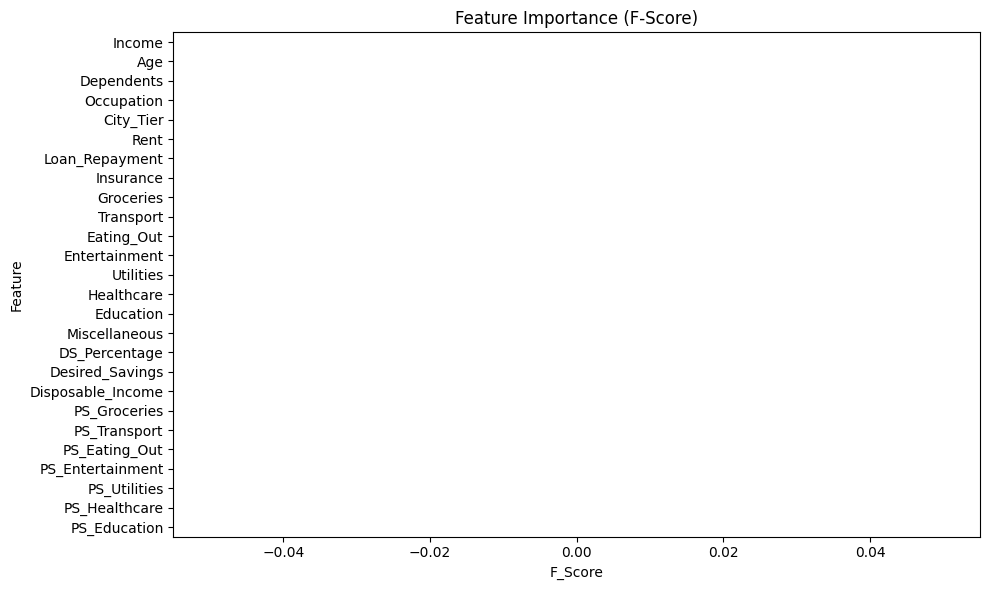

In [53]:
#  Plot Feature Importance
plt.figure(figsize=(10, 6))
sns.barplot(x='F_Score', y='Feature', data=feature_scores, palette='crest')
plt.title('Feature Importance (F-Score)')
plt.tight_layout()
plt.show()


In [56]:
# Keep top N features
top_features = feature_scores['Feature'].head(10).tolist()
X_selected = X[top_features]


##**Split Dataset (Train/Test)**

In [65]:
X_train,X_test,y_train,y_test=train_test_split(X_selected, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(8218, 10)

In [67]:
X_test.shape

(2055, 10)

In [68]:
y_train.shape

(8218,)

In [69]:
y_test.shape

(2055,)

##**Feature Scaling**

- Technique used to standardize or normalize the range of independent variables (features) in a dataset.

In [70]:
scalar=StandardScaler()
X_train_scaled=scalar.fit_transform(X_train)
X_test_scaled=scalar.fit_transform(X_test)